In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [17]:
file_path = "Crime_Data_from_2020_to_Present (2).csv"
df = pd.read_csv(file_path,parse_dates = ['TIME OCC'])

In [18]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [19]:
a=df["Crm Cd Desc"].value_counts()
print(a)

VEHICLE - STOLEN                                           88355
BATTERY - SIMPLE ASSAULT                                   65728
THEFT OF IDENTITY                                          52136
BURGLARY FROM VEHICLE                                      50616
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    50274
                                                           ...  
GRAND THEFT / AUTO REPAIR                                      5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                       4
FAILURE TO DISPERSE                                            3
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: Crm Cd Desc, Length: 138, dtype: int64


In [20]:
import pandas as pd

print(df.head())
df.dtypes

       DR_NO               Date Rptd                DATE OCC TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM     2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM     0330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM     1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     0415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER RE

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC           object
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [21]:
print(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           114148
Vict Age               0
Vict Sex          108529
Vict Descent      108537
Premis Cd             10
Premis Desc          488
Weapon Used Cd    537498
Weapon Desc       537498
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          764505
Crm Cd 3          823173
Crm Cd 4          825151
LOCATION               0
Cross Street      693343
LAT                    0
LON                    0
dtype: int64


In [22]:
df.drop_duplicates(inplace=True)

In [64]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['Premis Cd'].fillna(df['Premis Cd'].mode()[0], inplace=True)
df['Crm Cd 1'].fillna(df['Crm Cd 1'].mode()[0], inplace=True)
df['Crm Cd 2'].fillna(df['Crm Cd 2'].mode()[0], inplace=True)
df['Crm Cd 3'].fillna(df['Crm Cd 3'].mode()[0], inplace=True)
df['Crm Cd 4'].fillna(df['Crm Cd 4'].mode()[0], inplace=True)
df['Weapon Used Cd'].fillna(df['Weapon Used Cd'].mean(), inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['LAT', 'LON']] = scaler.fit_transform(df[['LAT', 'LON']])

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Vict Sex'] = label_encoder.fit_transform(df['Vict Sex'])
df['Cross Street'] = label_encoder.fit_transform(df['Cross Street'])
df['Weapon Desc'] = label_encoder.fit_transform(df['Weapon Desc'])
df['Premis Desc'] = label_encoder.fit_transform(df['Premis Desc'])
df['Mocodes '] = label_encoder.fit_transform(df['Mocodes'])

In [43]:
print(df.head())
print(df.dtypes)

       DR_NO  Date Rptd   DATE OCC TIME OCC  AREA    AREA NAME  Rpt Dist No  \
0   10304468 2020-01-08 2020-01-08     2230     3    Southwest          377   
1  190101086 2020-01-02 2020-01-01     0330     1      Central          163   
2  200110444 2020-04-14 2020-02-13     1200     1      Central          155   
3  191501505 2020-01-01 2020-01-01     1730    15  N Hollywood         1543   
4  191921269 2020-01-01 2020-01-01     0415    19      Mission         1998   

   Part 1-2  Crm Cd                                        Crm Cd Desc  ...  \
0         2     624                           BATTERY - SIMPLE ASSAULT  ...   
1         2     624                           BATTERY - SIMPLE ASSAULT  ...   
2         2     845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...   
3         2     745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...   
4         2     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   

  Cross Street       LAT       LON Year_OCC  Month

In [44]:
import pandas as pd

# Assuming 'DATE OCC' and 'Date Rptd' are already converted to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Extracting year, month, and day for 'DATE OCC'
df['Year_OCC'] = df['DATE OCC'].dt.year
df['Month_OCC'] = df['DATE OCC'].dt.month
df['Day_OCC'] = df['DATE OCC'].dt.day

# Extracting year, month, and day for 'Date Rptd'
df['Year_Rptd'] = df['Date Rptd'].dt.year
df['Month_Rptd'] = df['Date Rptd'].dt.month
df['Day_Rptd'] = df['Date Rptd'].dt.day

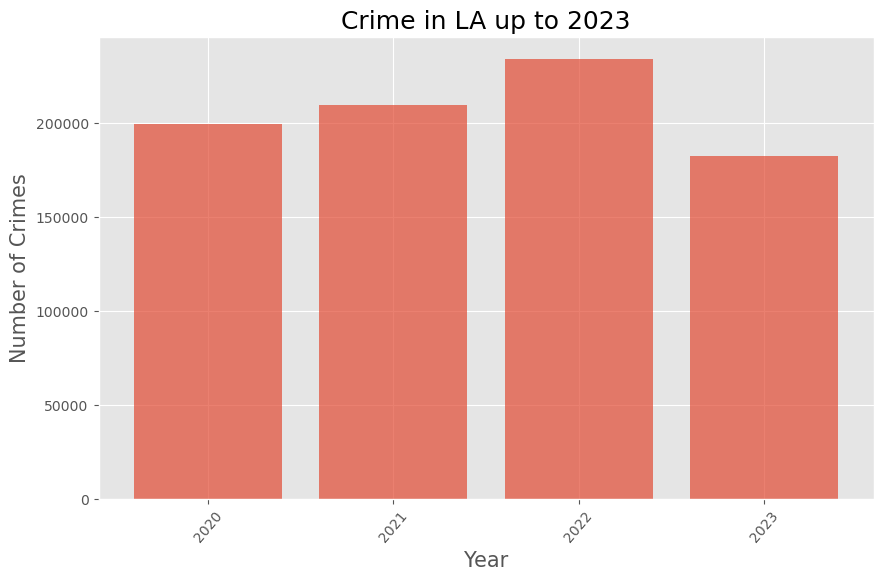

In [45]:
import matplotlib.pyplot as plt


mask_year = df['Year_OCC'] <= 2024
n_crime = df[mask_year]['Year_OCC'].value_counts().sort_index()  
# Creating the bar plot
plt.figure(figsize=(10, 6))  
plt.bar(n_crime.index, n_crime, alpha=0.7)  # Use the index for x-values
plt.xticks(n_crime.index, rotation=50)  # Use the index for x-tick labels
plt.xlabel('Year', size=15)
plt.ylabel('Number of Crimes', size=15)
plt.title('Crime in LA up to 2023', size=18) 
plt.show()


In [46]:
first_n = 5
print(df['Crm Cd Desc'].value_counts(1)[:first_n].sum())

other = 1-df["Crm Cd Desc"].value_counts(1)[:first_n].sum()
top_5_crime = df["Crm Cd Desc"].value_counts(1)[:first_n].index
print(top_5_crime.values)

0.3721577000819183
['VEHICLE - STOLEN' 'BATTERY - SIMPLE ASSAULT' 'THEFT OF IDENTITY'
 'BURGLARY FROM VEHICLE'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']


In [47]:
percent = 0.6
df_percent = df['Crm Cd Desc'].value_counts(1).cumsum()<=percent
Crime_Code_Description_most = df_percent[df_percent].index.values

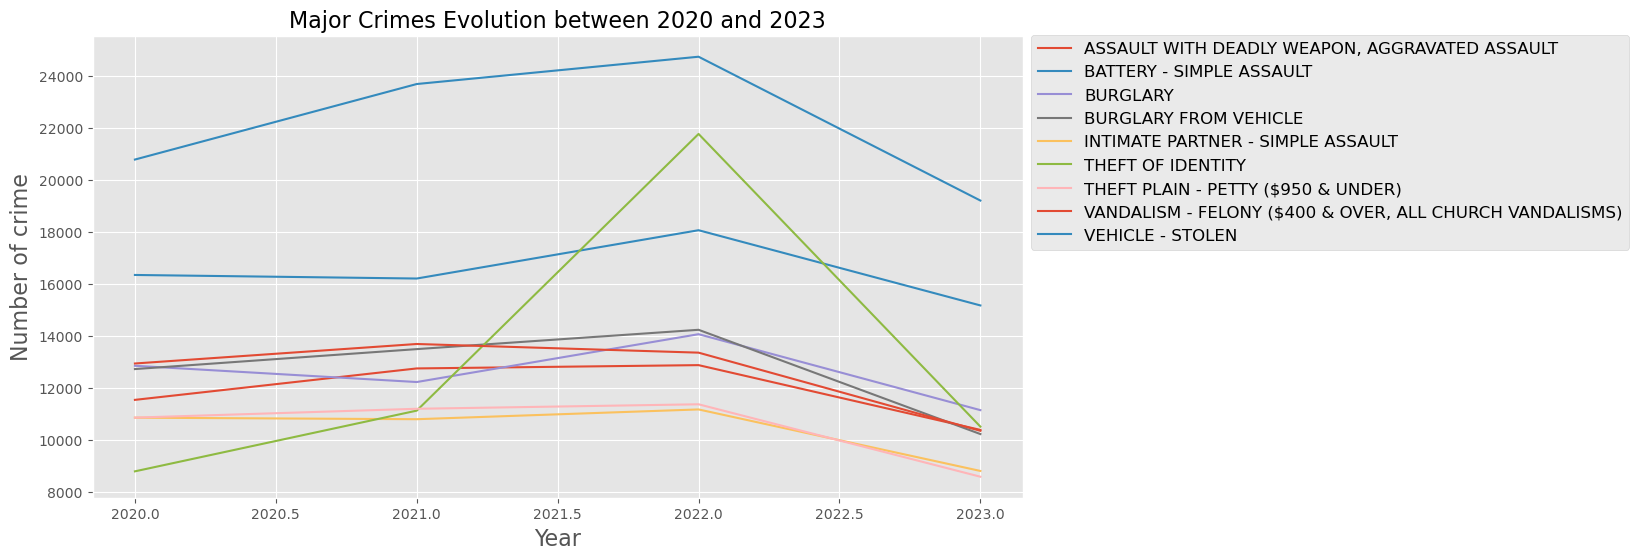

In [48]:
df_index_crime = df.set_index('Crm Cd Desc')
df_most = df_index_crime.loc[Crime_Code_Description_most, :]
df_most.reset_index(inplace=True)

ax = df_most.groupby([ 'Year_OCC','Crm Cd Desc'])[
    'DR_NO'].count().unstack().loc[2020:2023,:].plot(figsize=(12,6))
legend(bbox_to_anchor=(1.0, 1.02), fontsize=12)
title('Major Crimes Evolution between 2020 and 2023', fontsize=16)
ylabel('Number of crime', fontsize=16)
xlabel('Year', fontsize=16);

In [49]:
def count_rows(x):
    return len(x)

df2 = df.groupby(['Year_OCC','Crm Cd Desc']).apply(count_rows).unstack()
df2.head()
df2.reset_index(inplace = True)

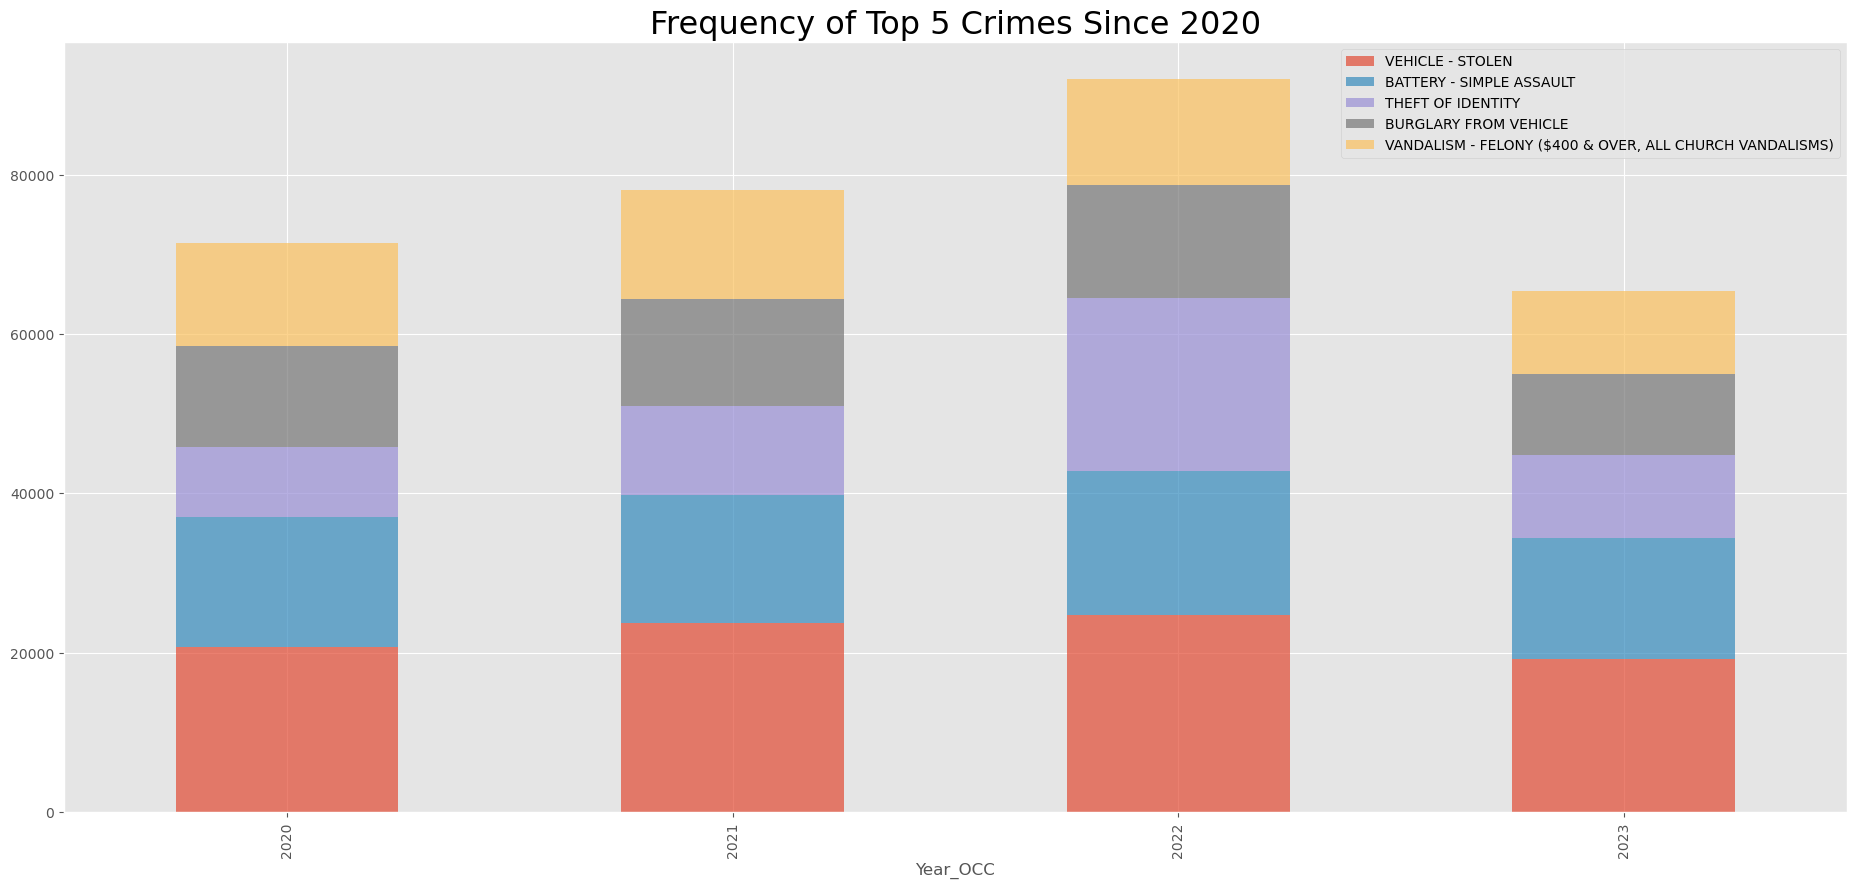

In [50]:
figure = figsize(23,10) 
df2.plot.bar(x= "Year_OCC", y = top_5_crime, stacked = True, alpha = 0.7);
legend();
title('Frequency of Top 5 Crimes Since 2020', size = 23);

In [51]:
from scipy import stats

# Columns to investigate for outliers
columns_to_investigate = ['Vict Age', 'LAT', 'LON']  # Add more columns as needed

for column in columns_to_investigate:
    z_scores = stats.zscore(df[column])
    outliers = df[(z_scores > 3) | (z_scores < -3)]  # Identify outliers beyond 3 standard deviations
    print(f"Column: {column}, Number of Outliers: {outliers.shape[0]}")
    print(outliers[column])  # Display the outliers for the specific column

Column: Vict Age, Number of Outliers: 517
2076      96
2088      99
2336      99
2362      99
2376      99
          ..
822762    99
824276    99
824282    99
824382    99
824580    98
Name: Vict Age, Length: 517, dtype: int64
Column: LAT, Number of Outliers: 2263
1403     -19.032868
2096     -19.032868
3147     -19.032868
4894     -19.032868
5074     -19.032868
            ...    
408676   -19.032868
497209   -19.032868
691855   -19.032868
698859   -19.032868
787963   -19.032868
Name: LAT, Length: 2263, dtype: float64
Column: LON, Number of Outliers: 2263
1403      19.067015
2096      19.067015
3147      19.067015
4894      19.067015
5074      19.067015
            ...    
408676    19.067015
497209    19.067015
691855    19.067015
698859    19.067015
787963    19.067015
Name: LON, Length: 2263, dtype: float64


In [68]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['LAT', 'LON']]))
threshold = 3 
outliers_z = df[(z_scores > threshold).any(axis=1)]
outliers_z

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,Year_OCC,Month_OCC,Day_OCC,Year_Rptd,Month_Rptd,Day_Rptd,Mocodes
1403,200311971,2020-05-27,2020-05-27,1000,3,Southwest,361,2,900,VIOLATION OF COURT ORDER,...,9710,-19.032868,19.067015,2020,5,27,2020,5,27,4789
2096,210705082,2020-12-15,2020-12-13,2300,7,Wilshire,758,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,9710,-19.032868,19.067015,2020,12,13,2020,12,15,39037
3147,200208374,2020-03-30,2020-03-30,1620,2,Rampart,271,2,901,VIOLATION OF RESTRAINING ORDER,...,9710,-19.032868,19.067015,2020,3,30,2020,3,30,269299
4894,200817064,2020-12-01,2020-12-01,1340,8,West LA,882,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,1216,-19.032868,19.067015,2020,12,1,2020,12,1,242742
5074,201711596,2020-07-27,2020-07-27,1220,17,Devonshire,1756,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,9696,-19.032868,19.067015,2020,7,27,2020,7,27,33404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408676,210304042,2021-01-01,2021-01-01,1310,3,Southwest,315,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,3895,-19.032868,19.067015,2021,1,1,2021,1,1,138811
497209,221913163,2022-08-13,2022-08-12,2100,19,Mission,1986,1,510,VEHICLE - STOLEN,...,9601,-19.032868,19.067015,2022,8,12,2022,8,13,275294
691855,230209890,2023-05-01,2023-05-01,0730,2,Rampart,252,2,624,BATTERY - SIMPLE ASSAULT,...,7007,-19.032868,19.067015,2023,5,1,2023,5,1,243121
698859,231611142,2023-08-16,2023-08-16,2010,16,Foothill,1648,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,4676,-19.032868,19.067015,2023,8,16,2023,8,16,80118


In [67]:
# Calculate IQR for numerical columns
Q1 = df['Crm Cd 1'].quantile(0.25)
Q3 = df['Crm Cd 2'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Crm Cd 1'] < threshold_low) | (df['Crm Cd 2'] > threshold_high)]
outliers_iqr


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,Year_OCC,Month_OCC,Day_OCC,Year_Rptd,Month_Rptd,Day_Rptd,Mocodes
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,9710,0.105561,-0.060167,2020,1,1,2020,1,1,19749
5,200100501,2020-01-02,2020-01-01,0030,1,Central,163,1,121,"RAPE, FORCIBLE",...,9710,0.036498,-0.036177,2020,1,1,2020,1,2,74210
6,200100502,2020-01-02,2020-01-02,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,9710,0.038234,-0.037744,2020,1,2,2020,1,2,190409
7,200100504,2020-01-04,2020-01-04,0040,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,9710,0.036274,-0.035208,2020,1,4,2020,1,4,184163
8,200100507,2020-01-04,2020-01-04,0200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,9710,0.049101,-0.033980,2020,1,4,2020,1,4,220726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825002,231900561,2023-02-13,2023-02-12,1730,19,Mission,1956,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,9710,0.152499,-0.069165,2023,2,12,2023,2,13,19749
825043,231300849,2023-06-15,2023-06-15,2045,13,Newton,1362,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,924,0.009276,-0.038083,2023,6,15,2023,6,15,108838
825046,232105737,2023-02-16,2023-02-16,1806,21,Topanga,2156,1,210,ROBBERY,...,9710,0.119732,-0.092879,2023,2,16,2023,2,16,12407
825080,232007881,2023-04-07,2023-04-07,2030,20,Olympic,2039,2,624,BATTERY - SIMPLE ASSAULT,...,9710,0.044676,-0.041524,2023,4,7,2023,4,7,127790


Text(0.5, 1.0, 'Box plot for Vict Sex')

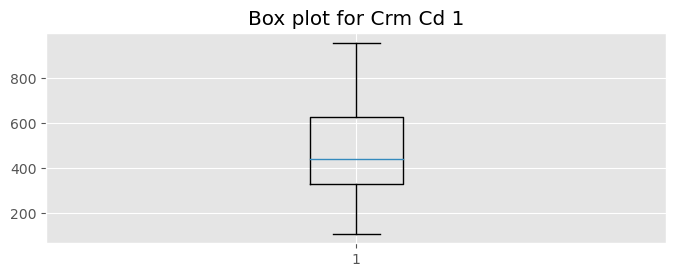

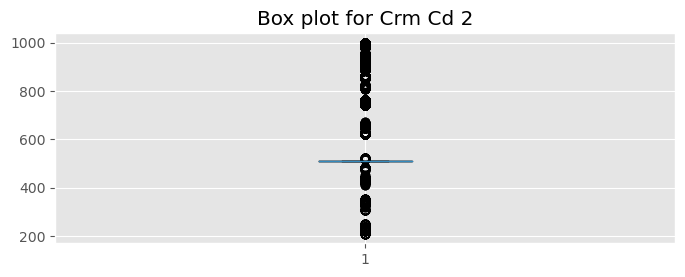

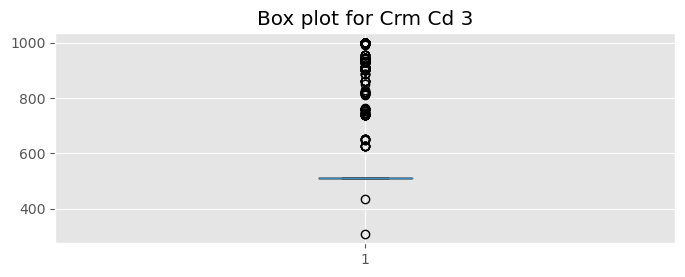

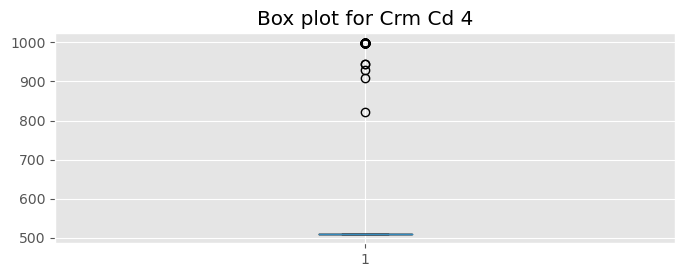

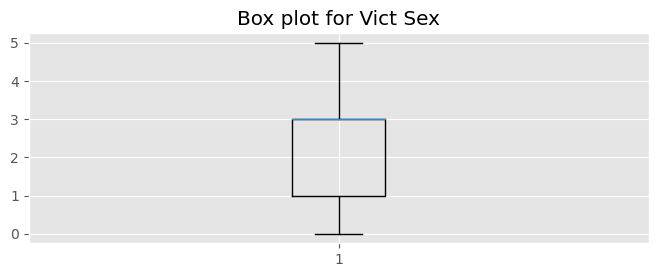

In [70]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.boxplot(df['Crm Cd 1'])
plt.title('Box plot for Crm Cd 1')

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.boxplot(df['Crm Cd 2'])
plt.title('Box plot for Crm Cd 2')

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.boxplot(df['Crm Cd 3'])
plt.title('Box plot for Crm Cd 3')

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.boxplot(df['Crm Cd 4'])
plt.title('Box plot for Crm Cd 4')

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.boxplot(df['Vict Sex'])
plt.title('Box plot for Vict Sex')